## Scikit-Learn Machine Learning with car data - full set

Author: Ty

Date: 1/22/2019

So, a lot of people have been wondering, what is a simple example that uses Machine Learning/Artificial Intelligence (ML/AI) and is free? 

Here is a basic machine learning model I created with Python using the library Scikit-Learn. I asked a small group of volunteers how they value certain attributes on a scale of 1-10. 1 being the lowest and 10 being the highest. Then they choose what type of vehicle it would be between a Sedan, SUV, or Truck. Using this data, I could train a basic K nearest neighbor model. Lastly, I asked some new volunteers what their values were and I could test to see if my model's prediction was correct. The result can be used as a prediction evaluation tool or as a recommendation system.

This file also contains some additional models and methods to test the models.

In [1]:
#First import pandas so that we can see the data in a dataframe view.
import pandas as pd

In [2]:
#Read the CSV file
#The Index column will be the first column
mydata= pd.read_excel('Car_Data_WIP.xlsx')

In [3]:
#Preview the data. This is a small dataset, so I can show all of it.
mydata

,Record_ID,Name,MPG,Power,Storage_Capacity,Towing,Type,City,State
0,1,Ben,9,6,6,8,SUV,Burbank,CA
1,2,Patrick,9,7,6,5,Sedan,Burbank,CA
2,3,Matt,10,5,7,1,Sedan,Sherman Oaks,CA
3,4,Jared,5,1,6,1,Sedan,Santa Monica,CA
4,5,Andrew,7,8,9,2,Sedan,Burbank,CA
5,6,Aaron,9,6,10,8,Truck,North Hollywood,CA
6,7,Tom,7,7,7,3,Sedan,Torrance,CA
7,8,Philip,6,8,8,5,SUV,Burbank,CA
8,9,Eli,7,5,8,3,Truck,Whittier,CA
9,10,Kirk,8,7,7,1,SUV,Santa Clarita,CA


In [4]:
#Assign the X values
X = mydata[['MPG', 'Power', 'Storage_Capacity', 'Towing']]

In [5]:
#Preview our data
#Now we have our X data ready to Fit into the model
X.head()

,MPG,Power,Storage_Capacity,Towing
0,9,6,6,8
1,9,7,6,5
2,10,5,7,1
3,5,1,6,1
4,7,8,9,2


In [6]:
#Check the shape of our X data
#Check the data type of our X data
print (type(X))
print (X.shape)

<class 'pandas.core.frame.DataFrame'>
(19, 4)


In [7]:
#Assign the y values
#Alt way is: y = mydata['Type'] #This does a dataframe
y = mydata.Type#This does a numpy array

In [8]:
#Preview our data
#Now we have our y data ready to Fit into the model
y.head()

0      SUV
1    Sedan
2    Sedan
3    Sedan
4    Sedan
Name: Type, dtype: object

In [9]:
#Check the shape of our X data
#Check the data type of our X data
print (type(y))
print (y.shape)

<class 'pandas.core.series.Series'>
(19,)


First lets try the Iris way. KNN

In [10]:
#Step 1: Import the class you plan to use. We are using nearest neighbor here.
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#Step 2: "Instantiate" the "estimator"
#"Estimator" is scikit-learn's term for model
#"Instantiate" means "make an instance of"

knn = KNeighborsClassifier(n_neighbors=1)

In [12]:
print (knn)
#You can see all of the default parameters

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


In [13]:
#Step 3: Fit the model with data (aka "model training")
#Model is learing the relationship between X and y
#Occurs in-place. So you don't need to assign the results to a new object.
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

These are people who are out-of-sample/people who were not in the training data, but instead the test data.

In [14]:
#Here is an example of one Out-of-Sample observation we can test
knn.predict([[8,5,8,3]])

array(['Truck'], dtype=object)

In [15]:
#You can also predict for mulitple observations at once
X_new = [[9,6,6,8], [9,7,6,5],[4,6,10,10]]
#I copy/paste Record 1, Record 2, and then put my own numbers

#Run multiple ones:
knn.predict(X_new)

array(['SUV', 'Sedan', 'Truck'], dtype=object)

Model tuning. Change nearest neighbor to 5
---

K Nearest Neighbor means it looks at the value that is closest to it from a scatter plot perspective. n=1 means the 1 nearest neighbor. Whereas n=5 means it looks at the 5 nearest neighbors.

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
knn.predict(X_new)
#You can see that our results are different.

array(['SUV', 'Sedan', 'SUV'], dtype=object)

## Logistic Regression
Now lets use a different type of classification model

We are going to use a Logistic Regression model

In [19]:
#import the class
from sklearn.linear_model import LogisticRegression

In [20]:
#instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', multi_class = 'auto')

In [21]:
#fit the model with data
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
#Predict the response for new observations
logreg.predict(X_new)

array(['SUV', 'SUV', 'Truck'], dtype=object)

## Summary of results

As you can see, we got different results based on the model that was run.

## How well is our model doing?

This is a common question. So, let's use predicted vs true response  values.

First we are going to train and test with the same data.

In [23]:
#This is Logistic Regression. Already fit X and y for Logistic Regression. We already also imported it and assigned logreg.
#Let's get what our model thinks the values are by testing itself on the training data.
logreg.predict(X)

array(['SUV', 'SUV', 'Sedan', 'Sedan', 'SUV', 'Truck', 'Sedan', 'SUV',
       'Sedan', 'Sedan', 'Sedan', 'Sedan', 'Sedan', 'Sedan', 'Sedan',
       'SUV', 'Sedan', 'Sedan', 'Sedan'], dtype=object)

In [24]:
#Store the answers
y_pred = logreg.predict(X)

In [25]:
#Number of predictions
len(y_pred)

19

In [26]:
#We are testing the model on the same data we used to train the model.
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))
#So the accury of the logistic regresssion model vs the actual answers was 70% accurate.

0.6842105263157895


Now lets test the KNN models.

In [27]:
#Lets do n = 1 first
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)
print (metrics.accuracy_score(y,y_pred))

1.0


In [28]:
#Now n = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
print (metrics.accuracy_score(y,y_pred))

0.5789473684210527


## Summary of testing on training data


KNN (K=1) This looks great at 100%, but the problem is the model itself. This is a problem with training and test your data on the same model. We need to test on out-of-sample data. Still, it is a start and has interesting results. If I were to choose one, I would go to the logistic regression.

## Testing our model with the method: Train/Test Split

Here were are going to split our data set into 2 pieces: training and testing sets

Like an 80/20 split

We are going to use Scikit-learns built in train/test split function. We are going to split the X and y into 2 parts

In [29]:
#Step 1: Split X and y into training and testing sets
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=4)

In [31]:
#print the shapes of the new X objects
print (X_train.shape)
print (X_test.shape)

(11, 4)
(8, 4)


In [32]:
#print the shapes of the new y objects
print (y_train.shape)
print (y_test.shape)

(11,)
(8,)


In [33]:
#Step 2: train the model on the training set
logreg = LogisticRegression(solver='lbfgs', multi_class = 'auto')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
#Step 3: Make predicitons on the testing set
y_pred = logreg.predict(X_test)

In [35]:
#Compare the actual response values (y_test) with predicted response values (y_pred)
print (metrics.accuracy_score(y_test, y_pred))
#My answer is 50% with logistic regression

0.375


In [36]:
#Repeat for KNN with K=1:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.5


In [37]:
#Repeat for KNN with K=5:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.625


In [38]:
#Let's try every value of K. 
# try K=1 through K=12
k_range = list(range(1, 12))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))#Same as his Pandas tech

Text(0, 0.5, 'Testing Accuracy')

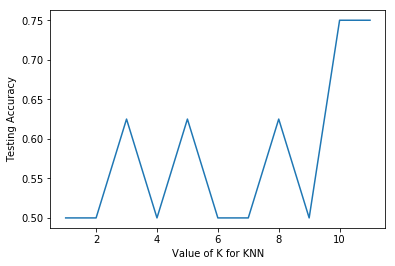

In [39]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Training accuracy rises as model complexity increases
Testing accuracy penalizes models that are too complex or not complex enough
For KNN models, complexity is determined by the value of K (lower value = more complex) nearest neighbor

So, you want a K value that give you the best accuracy.
You need a good balance of model complexity.

## Making predictions on out-of-sample data

In [40]:
# instantiate the model with the best known parameters. Make sure to set n
knn = KNeighborsClassifier(n_neighbors=10)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

# make a prediction for an out-of-sample observation
#Creating our own observation
knn.predict([[8, 5, 8, 3]])

array(['Sedan'], dtype=object)

So, using n = x, we are x% confident with the answer using the Train/Test Split. The answer the model gave based on the values I entered, it suggests a 'x' as my car.

## Summary of Train/Test Split

So, there are way to test the data, but this is one of the most common. It also lets you see the confidence and determine which knn value is the best.

In [ ]:
#This is a hard save. Committing